In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

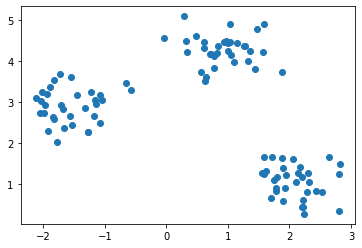

In [40]:
# Import data and print graph
X, y = make_blobs(n_samples=100, centers=3, cluster_std=0.4, random_state=0)
plt.scatter(X[:,0], X[:,1])

-30.870531280140664

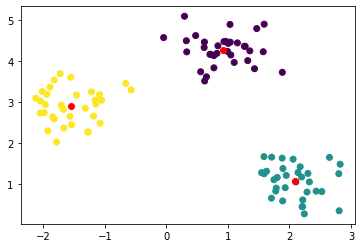

In [41]:
# identifie different classes and target their center
model = KMeans(n_clusters=3)
model.fit(X)
model.predict(X)
plt.scatter(X[:,0], X[:,1], c=model.predict(X))
plt.scatter(model.cluster_centers_[:,0], model.cluster_centers_[:,1], c='r')
model.score(X)

Text(0, 0.5, 'Cout du modele (Inertia)')

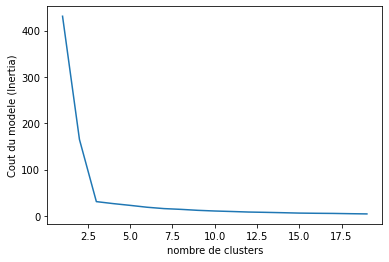

In [42]:
# Elbow Method to identidie number of cluster
inertia = []
K_range = range(1, 20)
for k in K_range:
    model = KMeans(n_clusters=k).fit(X)
    inertia.append(model.inertia_)

plt.plot(K_range, inertia)
plt.xlabel('nombre de clusters')
plt.ylabel('Cout du modele (Inertia)')

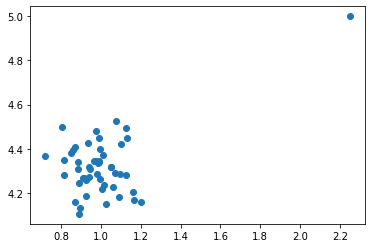

In [43]:
# find anomalies by spliting them with Isolation Forest
from sklearn.ensemble import IsolationForest
X, y = make_blobs(n_samples=50, centers=1, cluster_std=0.1, random_state=0)
X[-1,:] = np.array([2.25, 5])

plt.scatter(X[:,0], X[:, 1])

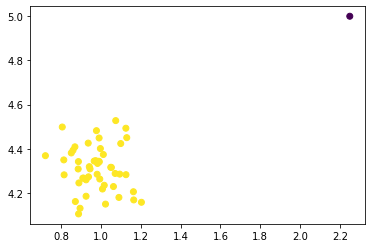

In [44]:
# target the isolated number with contamination of 1%
model = IsolationForest(contamination=0.01)
model.fit(X)

plt.scatter(X[:,0], X[:, 1], c=model.predict(X))

Text(0.5, 1.0, '0')

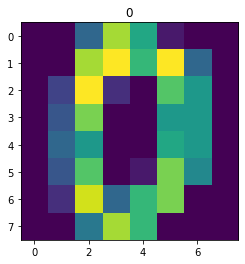

In [45]:
# outlier detection of images
from sklearn.datasets import load_digits

digits = load_digits()
images = digits.images
X = digits.data
y = digits.target

plt.imshow(images[0])
plt.title(y[0])

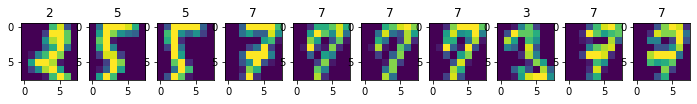

In [46]:
# outlier detection of every images
model = IsolationForest(random_state=0, contamination=0.02)
model.fit(X)
outliers = model.predict(X) == -1 

plt.figure(figsize=(12, 3))
for i in range(10):
  plt.subplot(1, 10, i+1)
  plt.imshow(images[outliers][i])
  plt.title(y[outliers][i])

In [47]:
# Principal Component Analysis (PCA) minimise distance between point and directions
from sklearn.decomposition import PCA

model = PCA(n_components=2) # 2 components to show a 2D graph however with 52 and 46 we can get better results
model.fit(X)

PCA(n_components=2)

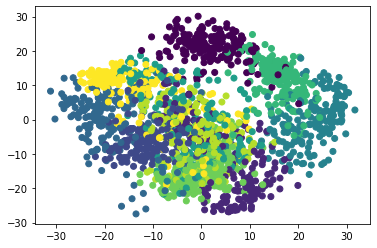

In [48]:
x_pca = model.transform(X)
plt.scatter(x_pca[:,0], x_pca[:,1], c=y)

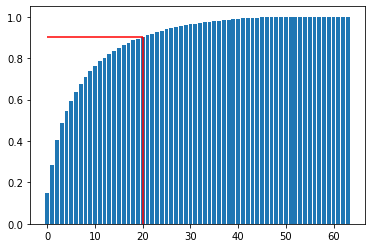

In [49]:
# find the best variance ratio
n_dims = X.shape[1]
model = PCA(n_components=n_dims)
model.fit(X)

variances = model.explained_variance_ratio_

meilleur_dims = np.argmax(np.cumsum(variances) > 0.90)


plt.bar(range(n_dims), np.cumsum(variances))
plt.hlines(0.90, 0, meilleur_dims, colors='r')
plt.vlines(meilleur_dims, 0, 0.90, colors='r')

In [50]:
model = PCA(n_components=0.99)
model.fit(X)

PCA(n_components=0.99)

Text(0.5, 1.0, 'Compressed')

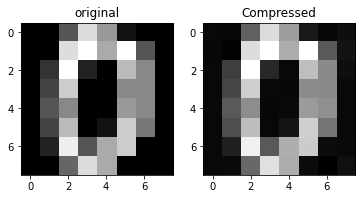

In [51]:
X_compress = model.fit_transform(X)
X_decompress = model.inverse_transform(X_compress)

plt.subplot(1, 2, 1)
plt.imshow(X[0,:].reshape((8,8)), cmap='gray')
plt.title('original')
plt.subplot(1, 2, 2)
plt.imshow(X_decompress[0,:].reshape((8,8)), cmap='gray')
plt.title('Compressed')
